## Pareto disctribution: https://en.wikipedia.org/wiki/Pareto_distribution  
(scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html)

### \begin{equation*} {f(x,b) = \frac{b}{x^{b+1}}}, {x\geq1, b>0} \end{equation*}

In [0]:
#import pyhon libraries
%matplotlib inline
import numpy as np
from scipy.stats import pareto, norm
import matplotlib.pyplot as plt

In [2]:
#pareto distribution parametes
b = 2.62
mean, var, skew, kurt = pareto.stats(b, moments='mvsk')
mean, var, skew, kurt

(array(1.61728395), array(1.61019907), array(nan), array(nan))

1.0038433729389633 5.799075708619393


Text(0,0.5,'$Pr(X=x)$')

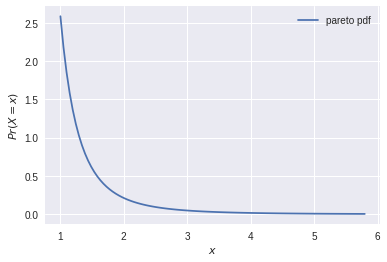

In [3]:
#display distribution interval
low = pareto.ppf(0.01, b)
top = pareto.ppf(0.99, b)
print (low, top)

#generate data
x = np.linspace(low, top, 100)
#find probability density function values
f = pareto.pdf(x,b)

#plot pdf interval
plt.plot(x, f, label='pareto pdf')
plt.legend(loc='best', frameon=False)
plt.xlabel('$x$')
plt.ylabel('$Pr(X=x)$')

Text(0,0.5,'$Pr(X=x)$')

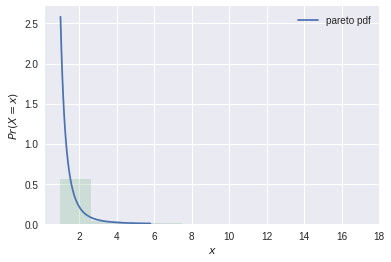

In [4]:
#generate random variable sample
r = pareto.rvs(b, size=1000)
#find pdf values
f = pareto.pdf(x,b)

#plot pdf & histogram
plt.plot(x, f , label='pareto pdf')
plt.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False)
plt.xlabel('$x$')
plt.ylabel('$Pr(X=x)$')

\begin{equation*} 
{\displaystyle \operatorname {E} (X)={\begin{cases}\infty ;\alpha \leq 1,\\{\frac {\alpha x_{\mathrm {m} }}{\alpha -1}};\alpha >1.\end{cases}}} 
\end{equation*}

\begin{equation*} 
{\displaystyle \operatorname {Var} (X)={\begin{cases}\infty ;\alpha \in (1,2],\\\left({\frac {x_{\mathrm {m} }}{\alpha -1}}\right)^{2}{\frac {\alpha }{\alpha -2}};\alpha >2.\end{cases}}}
\end{equation*}

In [0]:
from math import inf, sqrt

def emperical_mean(x):
    """Calculate emperical mean of provided array of values"""
    return np.sum(x)/len(x)

def generate_data(n, b):
    """Generate array of emperical means with specified parameters"""
    return [emperical_mean(pareto.rvs(b, size=n)) for i in range(1000)]

def pareto_mean(b):
    return inf if b <= 1 else b/(b-1)

def pareto_variance(b):
    return inf if b <= 2 else (1/(b-1)**2) * b/(b-2)

def plot(emperical_data, x, f):
    plt.plot(x, f, label='$norm$')
    plt.hist(emperical_data, bins=40, normed=True, alpha=0.4, label='emperical data hist')
    plt.legend(loc='best', frameon=False)
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.show()


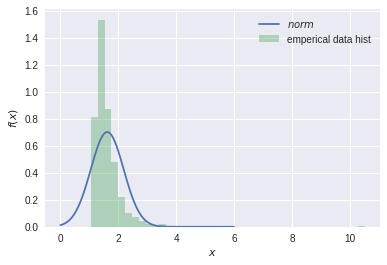

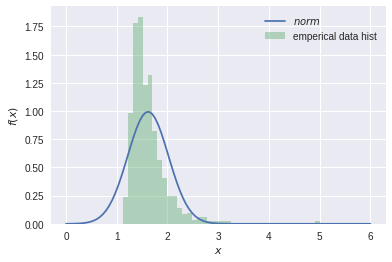

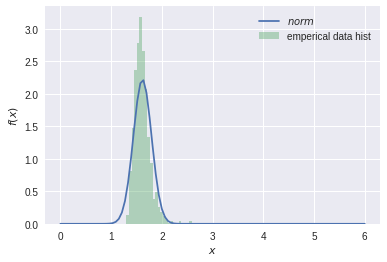

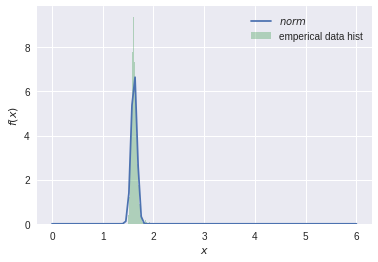

In [9]:
ed_5 = generate_data(n=5, b=b)
ed_10 = generate_data(n=10, b=b)
ed_50 = generate_data(n=50, b=b)
ed_500 = generate_data(n=500, b=b)

x = np.linspace(0,6,100)

#calculate normal distribution values & plot it

f5 = norm.pdf(x, loc=pareto_mean(b), scale=sqrt(pareto_variance(b)/5))
plot(ed_5, x, f5)

f10 = norm.pdf(x, loc=pareto_mean(b), scale=sqrt(pareto_variance(b)/10))
plot(ed_10, x, f10)

f50 = norm.pdf(x, loc=pareto_mean(b), scale=sqrt(pareto_variance(b)/50))
plot(ed_50, x, f50)

f500 = norm.pdf(x, loc=pareto_mean(b), scale=sqrt(pareto_variance(b)/500))
plot(ed_500, x, f500)

## Conclusions:
#### The shape of histograms form the normal distribution when the value of taken amount of random samples  increases. When n=5, the view is one-side skewed. It is not such comprised with n=50 and tends to resemble to N(EX, DX/n). Even because of high skewness of Pareto distribution, it will have a good fit with N only when n is big.